In [1]:
import torch
from matplotlib import pyplot as plt
import time
import numpy as np

In [2]:
import sys

# Add the directory containing the module to the system path
sys.path.append('/kaggle/input/make-ellipses')
sys.path.append('/kaggle/input/barycenter-fixed')

import make_ellipses
import Barycenter_fixed

from Barycenter_fixed import barycenter_debiased_2d, IBP_2d, barycenter_product_2d
from make_ellipses import make_nested_ellipses


In [3]:
sys.path.append('/kaggle/input/fwfreesupport')
from FWfreesuport.free_barycenter import barycenter_free, create_distribution_2d

In [4]:
sys.path.append('/kaggle/input/barycenter-sharp')
from Barycenter_sharpness.sharp_barycenter import sharp_barycenter_img

# 1. Variate number of samples

In [5]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# seed = 42
# epsilon = 0.002

# # n_samples = 10
# # list_width = [20, 40, 60, 80]

# width = 60
# list_samples = [5,10,15,20]


# list_time_debiased = []
# list_time_IBP = []
# list_time_product = []
# list_time_sharp = []
# list_time_free = []

# # for width in list_width:
# for n_samples in list_samples:
#     n_features = width ** 2
#     imgs_np = make_nested_ellipses(width, n_samples, seed=seed)
#     imgs_np /= imgs_np.sum((1, 2))[:, None, None]

#     # imgs = torch.tensor(imgs_np, dtype=torch.float64, device=device,
#     #                     requires_grad=False)
#     dists = create_distribution_2d(imgs_np)
#     imgs = imgs_np + 1e-10
#     imgs /= imgs.sum((1, 2))[:, None, None]

#     grid = torch.arange(width).type(torch.float64)
#     grid /= width
#     M = (grid[:, None] - grid[None, :]) ** 2
#     M_large = M[:, None, :, None] + M[None, :, None, :]
#     M_large = M_large.reshape(n_features, n_features)
#     M_large = M_large.to(device)
    
#     print('Doing debiased...')
#     time_debiased = time.time()
#     bar_debiased = barycenter_debiased_2d(imgs, M , reg=epsilon, maxiter=5000, tol=1e-5,weights=None).cpu()
#     time_debiased = time.time() - time_debiased
#     list_time_debiased.append(time_debiased)
    
#     print('Doing IBP...')
#     time_IBP = time.time()
#     bar_IBP = IBP_2d(imgs, M, reg=epsilon, maxiter=5000, tol=1e-5, weights=None).cpu()
#     time_IBP = time.time() - time_IBP
#     list_time_IBP.append(time_IBP)

#     print('Doing product...')
#     time_product = time.time()
#     bar_product = barycenter_product_2d(imgs, M, reg=epsilon, maxiter=500, tol=1e-5, weights=None).cpu()
#     time_product = time.time() - time_product
#     list_time_product.append(time_product)
    
#     print('Doing sharp...')
#     time_sharp = time.time()
#     bar_sharp, log_sharp = sharp_barycenter_img(imgs, M, M_large, epsilon, init=None, t0=1.,
#                          maxiter=2000, tol=1e-6, n_ls=20)
#     time_sharp = time.time() - time_sharp
#     list_time_sharp.append(time_sharp)
    
#     print('Doing free...')
#     time_free = time.time()
#     bar_free, log_free = barycenter_free(distributions=dists, grid_step=width,
#                                      epsilon=epsilon)
#     time_free = time.time() - time_free
#     list_time_free.append(time_free)

In [6]:
import torch
import time
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seed = 42
epsilon = 0.002

n_samples = 10
list_width = [10, 20, 40, 60]

# width = 60
# list_samples = [5, 10, 15, 20]

list_time_debiased = []
list_time_IBP = []
list_time_product = []
list_time_sharp = []
list_time_free = []

n_repeats = 5
for width in list_width:
# for n_samples in list_samples:
    time_debiased_repeats = []
    time_IBP_repeats = []
    time_product_repeats = []
    time_sharp_repeats = []
    time_free_repeats = []

    for _ in range(n_repeats):
        n_features = width ** 2
        imgs_np = make_nested_ellipses(width, n_samples, seed=seed)
        imgs_np /= imgs_np.sum((1, 2))[:, None, None]

        dists = create_distribution_2d(imgs_np)
        imgs = imgs_np + 1e-10
        imgs /= imgs.sum((1, 2))[:, None, None]

        grid = torch.arange(width).type(torch.float64)
        grid /= width
        M = (grid[:, None] - grid[None, :]) ** 2
        M_large = M[:, None, :, None] + M[None, :, None, :]
        M_large = M_large.reshape(n_features, n_features)
        M_large = M_large.to(device)
        
        print('Doing debiased...')
        start_time = time.time()
        bar_debiased = barycenter_debiased_2d(imgs, M , reg=epsilon, maxiter=5000, tol=1e-5, weights=None).cpu()
        time_debiased_repeats.append(time.time() - start_time)
        
        print('Doing IBP...')
        start_time = time.time()
        bar_IBP = IBP_2d(imgs, M, reg=epsilon, maxiter=5000, tol=1e-5, weights=None).cpu()
        time_IBP_repeats.append(time.time() - start_time)
        
        print('Doing product...')
        start_time = time.time()
        bar_product = barycenter_product_2d(imgs, M, reg=epsilon, maxiter=500, tol=1e-5, weights=None).cpu()
        time_product_repeats.append(time.time() - start_time)
        
        print('Doing sharp...')
        start_time = time.time()
        bar_sharp, log_sharp = sharp_barycenter_img(imgs, M, M_large, epsilon, init=None, t0=1.,
                             maxiter=2000, tol=1e-6, n_ls=20)
        time_sharp_repeats.append(time.time() - start_time)
        
        print('Doing free barycenter...')
        start_time = time.time()
        bar_free, log_free = barycenter_free(distributions=dists, grid_step=width,
                                         epsilon=epsilon)
        time_free_repeats.append(time.time() - start_time)

    list_time_debiased.append(np.mean(time_debiased_repeats))
    list_time_IBP.append(np.mean(time_IBP_repeats))
    list_time_product.append(np.mean(time_product_repeats))
    list_time_sharp.append(np.mean(time_sharp_repeats))
    list_time_free.append(np.mean(time_free_repeats))

/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
ABNORMAL TERMINATION IN LINESEARCH
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
ABNORMAL TERMINATION IN LINESEARCH
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
ABNORMAL TERMINATION IN LINESEARCH
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
ABNORMAL TERMINATION IN LINESEARCH
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
ABNORMAL TERMINATION IN LINESEARCH
Doing free barycenter...
D

/kaggle/input/barycenter-sharp/Barycenter_sharpness/sharp_barycenter.py:105: UserWarning: *** Maxiter reached ! err = 1.2556763204045474e-05 ***
  warnings.warn("*** Maxiter reached ! err = {} ***".format(err))


Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing iter 7 ..
Doing iter 8 ..
Doing iter 9 ..
Doing iter 10 ..
Doing iter 11 ..
Doing iter 12 ..
Doing iter 13 ..
Doing iter 14 ..
Doing iter 15 ..
Doing iter 16 ..
Doing iter 17 ..
Doing iter 18 ..
Doing iter 19 ..
Doing iter 20 ..
Doing iter 21 ..
Doing iter 22 ..
Doing iter 23 ..
Doing iter 24 ..
Doing iter 25 ..
Doing iter 26 ..
Doing iter 27 ..
Doing iter 28 ..
Doing iter 29 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing iter 7 ..
Doing iter 8 ..
Doing iter 9 ..
Doing iter 10 ..
Doing iter 11 ..
Doing iter 12 ..
Doing iter 13 ..
Doing iter 14 ..
Doing iter 15 ..
Doing iter 16 ..
Doing iter 17 ..
Doing iter 18 ..
Doing iter 19 ..
Doing iter 20 ..
Doing iter 21 ..
Doing iter 22 ..
Doing iter 23 ..
Doing iter 24 ..
Doin

/kaggle/input/barycenter-sharp/Barycenter_sharpness/sharp_barycenter.py:105: UserWarning: *** Maxiter reached ! err = 5.430714861818023e-06 ***
  warnings.warn("*** Maxiter reached ! err = {} ***".format(err))


Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing iter 7 ..
Doing iter 8 ..
Doing iter 9 ..
Doing iter 10 ..
Doing iter 11 ..
Doing iter 12 ..
Doing iter 13 ..
Doing iter 14 ..
Doing iter 15 ..
Doing iter 16 ..
Doing iter 17 ..
Doing iter 18 ..
Doing iter 19 ..
Doing iter 20 ..
Doing iter 21 ..
Doing iter 22 ..
Doing iter 23 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doing iter 3 ..
Doing iter 4 ..
Doing iter 5 ..
Doing iter 6 ..
Doing iter 7 ..
Doing iter 8 ..
Doing iter 9 ..
Doing iter 10 ..
Doing iter 11 ..
Doing iter 12 ..
Doing iter 13 ..
Doing iter 14 ..
Doing iter 15 ..
Doing iter 16 ..
Doing iter 17 ..
Doing iter 18 ..
Doing iter 19 ..
Doing iter 20 ..
Doing iter 21 ..
Doing iter 22 ..
Doing iter 23 ..
Doing debiased...
Doing IBP...
Doing product...
Doing sharp...
Doing free barycenter...
Doing iter 1 ..
Doing iter 2 ..
Doi

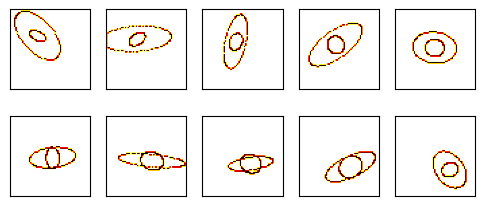

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(6, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(imgs[i],cmap='hot_r')
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(hspace=-0.7)
plt.show()

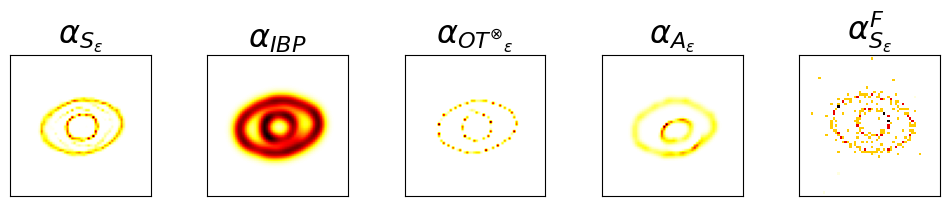

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

weights = bar_free.weights.flatten()
support = bar_free.support
x, y = support.T.numpy()

titles = [r"$\alpha_{S_{\varepsilon}}$",
          r"$\alpha_{IBP}$",
          r"$\alpha_{{OT^{\otimes}}_{\varepsilon}}$",
          r"$\alpha_{A_{\varepsilon}}$",
          r"$\alpha_{S_{\varepsilon}}^{F}$",
          r"$\alpha_{W}$"]
bars = [bar_debiased, bar_IBP, bar_product, bar_sharp, bar_free]
times = [list_time_debiased[-1], list_time_IBP[-1], list_time_product[-1], list_time_sharp[-1], list_time_free[-1]]

rc = {"legend.fontsize": 14,
      "axes.titlesize": 23,
      "axes.labelsize": 20,
      "xtick.labelsize": 15,
      "ytick.labelsize": 18,
      "pdf.fonttype": 42}
plt.rcParams.update(rc)

# Create a single figure and a set of subplots
f, axes = plt.subplots(1, 5, figsize=(12, 8))  # Adjust figsize for the whole subplot
for i, ax in enumerate(axes.ravel()):
    time_value = times[i]
    name = titles[i]
    tt = " Ran in %s s" % np.round(time_value, 2)

    if i == 4:
        # Use plt.hist2d directly on the ax object to control the size
        h = ax.hist2d(y, x, bins=grid, weights=weights, cmap="hot_r")
        # Set aspect ratio to be the same for the hist2d plot
        ax.set_aspect('equal', adjustable='box')
#         ax.set_xlabel(tt)

    else:
        ax.imshow(bars[i], cmap="hot_r")
#         ax.set_xlabel(tt)

    ax.set_xticks([])
    ax.set_yticks([])
#     if i == 0:
#         for spine in ax.spines.values():
#             spine.set_edgecolor('green')
#             spine.set_linewidth(5)
#         ax.set_title(name, color='green')
#     else:
#         ax.set_title(name)
    ax.set_title(name)
# Adjust layout to ensure proper spacing
plt.subplots_adjust(wspace=0.4)
plt.show()


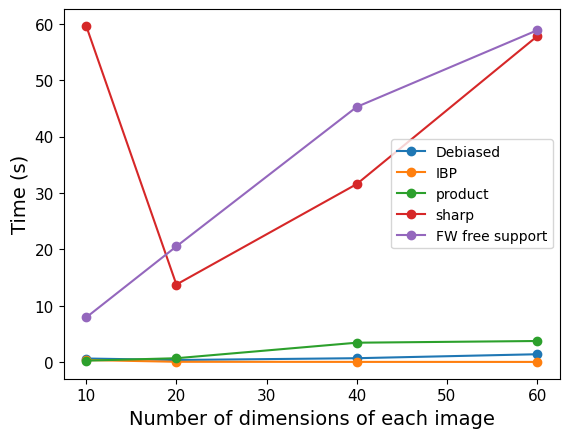

In [11]:
plt.plot(list_width, list_time_debiased,marker='o',label='Debiased')
plt.plot(list_width, list_time_IBP, marker='o', label='IBP')
plt.plot(list_width, list_time_product, marker='o', label='product')
plt.plot(list_width, list_time_sharp, marker='o', label='sharp')
plt.plot(list_width, list_time_free, marker='o', label='FW free support')
plt.legend(fontsize=10)
plt.xlabel('Number of dimensions of each image',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

# 2. Variate the dimension of the images

In [ ]:
# import torch
# import time
# import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# seed = 42
# epsilon = 0.002

# list_width = 60
# n_samples = 10

# list_time_debiased = []
# list_time_IBP = []
# list_time_product = []
# list_time_sharp = []
# list_time_free = []

# n_repeats = 10

# for width in list_width:
#     time_debiased_repeats = []
#     time_IBP_repeats = []
#     time_product_repeats = []
#     time_sharp_repeats = []
#     time_free_repeats = []

#     for _ in range(n_repeats):
#         n_features = width ** 2
#         imgs_np = make_nested_ellipses(width, n_samples, seed=seed)
#         imgs_np /= imgs_np.sum((1, 2))[:, None, None]

#         dists = create_distribution_2d(imgs_np)
#         imgs = imgs_np + 1e-10
#         imgs /= imgs.sum((1, 2))[:, None, None]

#         grid = torch.arange(width).type(torch.float64)
#         grid /= width
#         M = (grid[:, None] - grid[None, :]) ** 2
#         M_large = M[:, None, :, None] + M[None, :, None, :]
#         M_large = M_large.reshape(n_features, n_features)
#         M_large = M_large.to(device)
        
#         start_time = time.time()
#         bar_debiased = barycenter_debiased_2d(imgs, M , reg=epsilon, maxiter=5000, tol=1e-5, weights=None).cpu()
#         time_debiased_repeats.append(time.time() - start_time)
        
#         start_time = time.time()
#         bar_IBP = IBP_2d(imgs, M, reg=epsilon, maxiter=5000, tol=1e-5, weights=None).cpu()
#         time_IBP_repeats.append(time.time() - start_time)

#         start_time = time.time()
#         bar_product = barycenter_product_2d(imgs, M, reg=epsilon, maxiter=500, tol=1e-5, weights=None).cpu()
#         time_product_repeats.append(time.time() - start_time)
        
#         start_time = time.time()
#         bar_sharp, log_sharp = sharp_barycenter_img(imgs, M, M_large, epsilon, init=None, t0=1.,
#                              maxiter=2000, tol=1e-6, n_ls=20)
#         time_sharp_repeats.append(time.time() - start_time)
        
#         start_time = time.time()
#         bar_free, log_free = barycenter_free(distributions=dists, grid_step=width,
#                                          epsilon=epsilon)
#         time_free_repeats.append(time.time() - start_time)

#     list_time_debiased.append(np.mean(time_debiased_repeats))
#     list_time_IBP.append(np.mean(time_IBP_repeats))
#     list_time_product.append(np.mean(time_product_repeats))
#     list_time_sharp.append(np.mean(time_sharp_repeats))
#     list_time_free.append(np.mean(time_free_repeats))

In [ ]:
# fig, axes = plt.subplots(2, 5, figsize=(6, 6))
# for i, ax in enumerate(axes.ravel()):
#     ax.imshow(imgs[i],cmap='hot_r')
#     ax.set_xticks([])
#     ax.set_yticks([])
# plt.subplots_adjust(hspace=-0.7)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import torch

# weights = bar_free.weights.flatten()
# support = bar_free.support
# x, y = support.T.numpy()

# titles = [r"$\alpha_{S_{\varepsilon}}$",
#           r"$\alpha_{IBP}$",
#           r"$\alpha_{{OT^{\otimes}}_{\varepsilon}}$",
#           r"$\alpha_{A_{\varepsilon}}$",
#           r"$\alpha_{S_{\varepsilon}}^{F}$",
#           r"$\alpha_{W}$"]
# bars = [bar_debiased, bar_IBP, bar_product, bar_sharp, bar_free]
# times = [time_debiased, time_IBP, time_product, time_sharp, time_free]

# rc = {"legend.fontsize": 14,
#       "axes.titlesize": 23,
#       "axes.labelsize": 20,
#       "xtick.labelsize": 15,
#       "ytick.labelsize": 18,
#       "pdf.fonttype": 42}
# plt.rcParams.update(rc)

# # Create a single figure and a set of subplots
# f, axes = plt.subplots(1, 5, figsize=(12, 8))  # Adjust figsize for the whole subplot
# for i, ax in enumerate(axes.ravel()):
#     time_value = times[i]
#     name = titles[i]

#     if i == 4:
#         # Use plt.hist2d directly on the ax object to control the size
#         h = ax.hist2d(y, x, bins=grid, weights=weights, cmap="hot_r")
#         # Set aspect ratio to be the same for the hist2d plot
#         ax.set_aspect('equal', adjustable='box')
#     else:
#         ax.imshow(bars[i], cmap="hot_r")
    
#     ax.set_xticks([])
#     ax.set_yticks([])
# #     if i == 0:
# #         for spine in ax.spines.values():
# #             spine.set_edgecolor('green')
# #             spine.set_linewidth(5)
# #         ax.set_title(name, color='green')
# #     else:
# #         ax.set_title(name)
#     ax.set_title(name)
# # Adjust layout to ensure proper spacing
# plt.subplots_adjust(wspace=0.4)
# plt.show()
